In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
!unzip drive/MyDrive/voiceEmotion.zip


Archive:  drive/MyDrive/voiceEmotion.zip
   creating: voiceEmotion/angry/
  inflating: voiceEmotion/angry/1_angry.wav  
  inflating: voiceEmotion/angry/10_angry.wav  
  inflating: voiceEmotion/angry/100_angry.wav  
  inflating: voiceEmotion/angry/101_angry.wav  
  inflating: voiceEmotion/angry/102_angry.wav  
  inflating: voiceEmotion/angry/103_angry.wav  
  inflating: voiceEmotion/angry/104_angry.wav  
  inflating: voiceEmotion/angry/105_angry.wav  
  inflating: voiceEmotion/angry/106_angry.wav  
  inflating: voiceEmotion/angry/107_angry.wav  
  inflating: voiceEmotion/angry/108_angry.wav  
  inflating: voiceEmotion/angry/109_angry.wav  
  inflating: voiceEmotion/angry/11_angry.wav  
  inflating: voiceEmotion/angry/110_angry.wav  
  inflating: voiceEmotion/angry/111_angry.wav  
  inflating: voiceEmotion/angry/112_angry.wav  
  inflating: voiceEmotion/angry/113_angry.wav  
  inflating: voiceEmotion/angry/114_angry.wav  
  inflating: voiceEmotion/angry/115_angry.wav  
  inflating: voice

**Import Modules**



In [3]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

**Load the Dataset**

In [4]:
base_path = 'voiceEmotion'

paths = []
labels = []

# Traverse the new directory structure
for dirname, _, filenames in os.walk(base_path):
    for filename in filenames:
        # Construct the full file path
        file_path = os.path.join(dirname, filename)
        paths.append(file_path)

        # Extract the label from the filename
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
print('Dataset is Loaded')

Dataset is Loaded


In [5]:
len(paths)


4048

In [6]:
paths[:5]


['voiceEmotion/happy/160_happy.wav',
 'voiceEmotion/happy/458_happy.wav',
 'voiceEmotion/happy/440_happy.wav',
 'voiceEmotion/happy/83_happy.wav',
 'voiceEmotion/happy/386_happy.wav']

In [7]:
labels[:5]


['happy', 'happy', 'happy', 'happy', 'happy']

In [8]:
## Create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

speech  label
0  voiceEmotion/happy/160_happy.wav  happy
1  voiceEmotion/happy/458_happy.wav  happy
2  voiceEmotion/happy/440_happy.wav  happy
3   voiceEmotion/happy/83_happy.wav  happy
4  voiceEmotion/happy/386_happy.wav  happy

In [9]:
df['label'].value_counts()


label
happy        592
angry        592
surprised    592
disgust      592
fear         592
sad          592
neutral      496
Name: count, dtype: int64

**Exploratory Data Analysis**


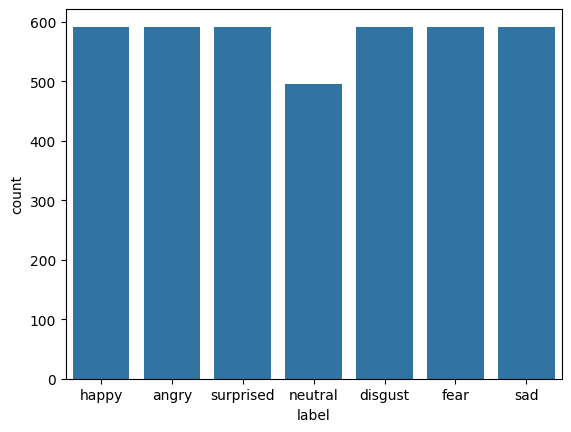

In [10]:
sns.countplot(data=df, x='label');


In [11]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

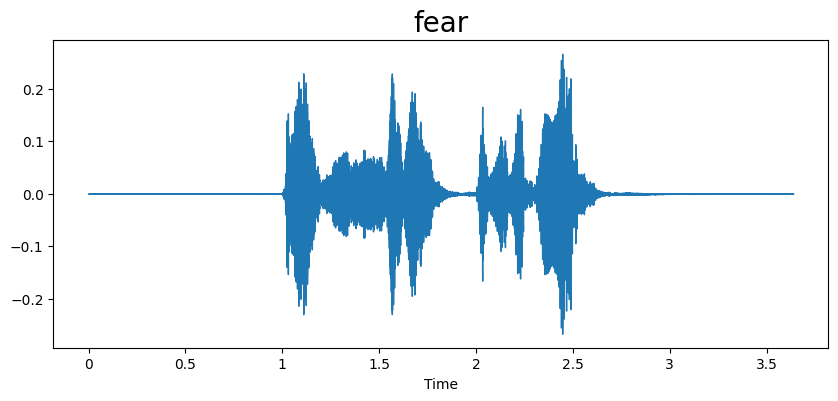

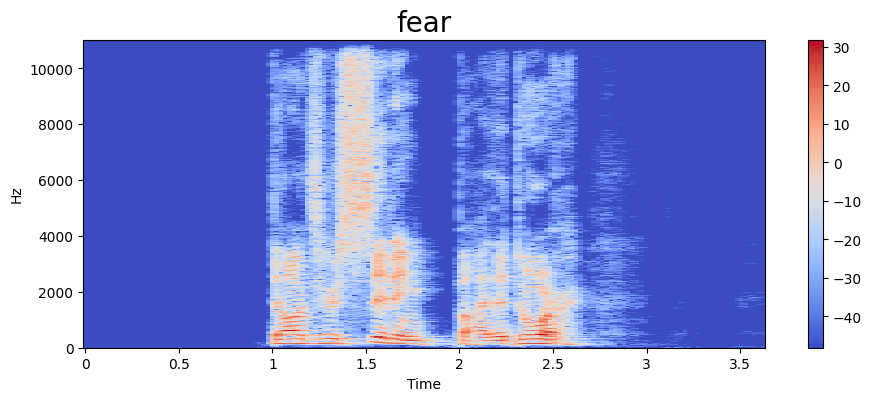

In [12]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

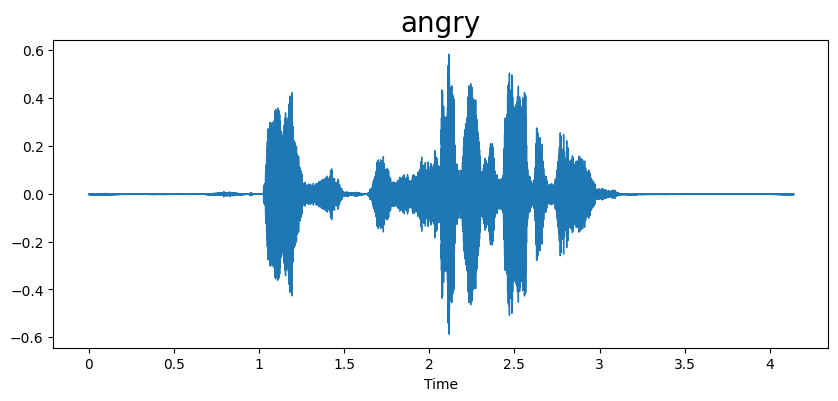

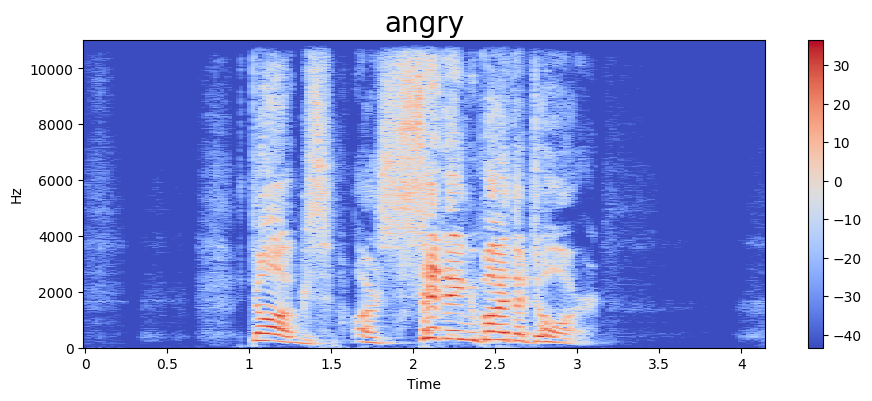

In [13]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

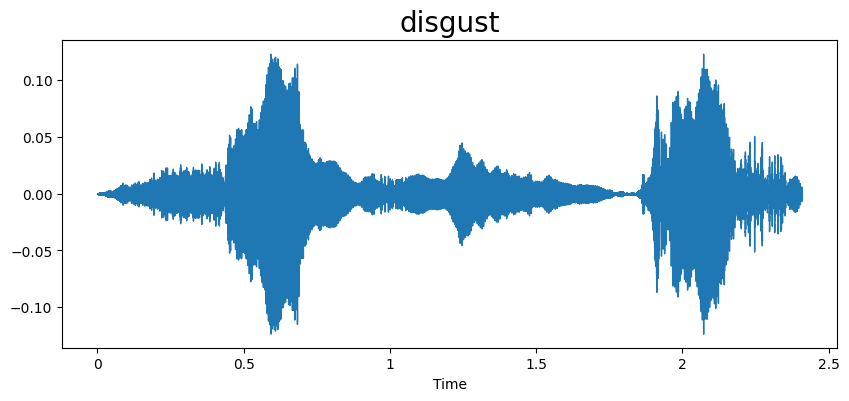

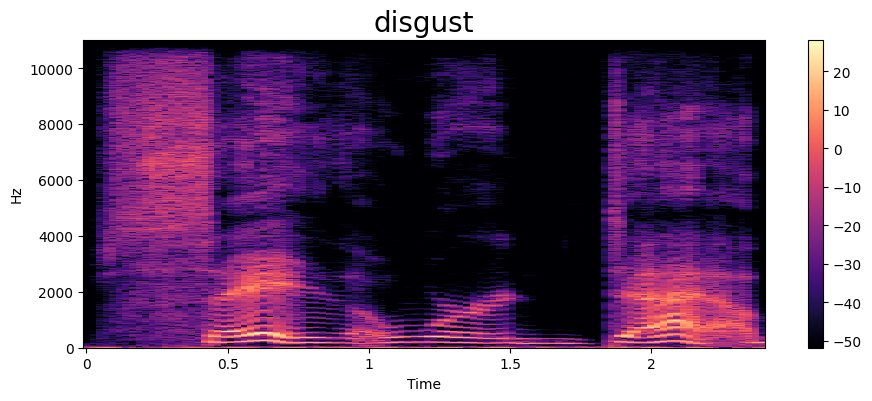

In [14]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

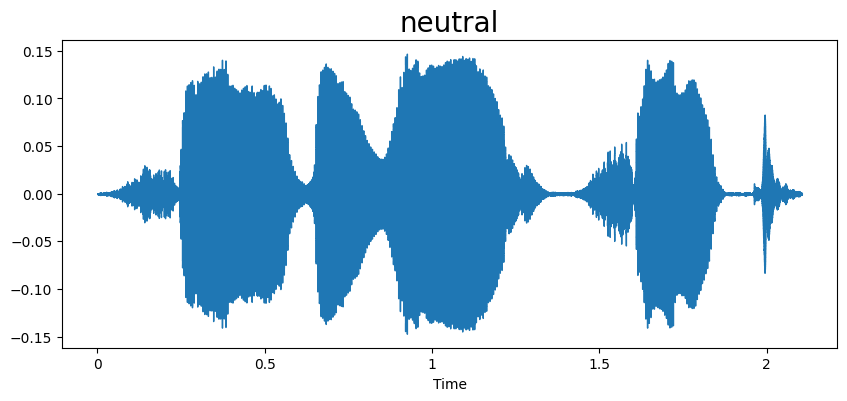

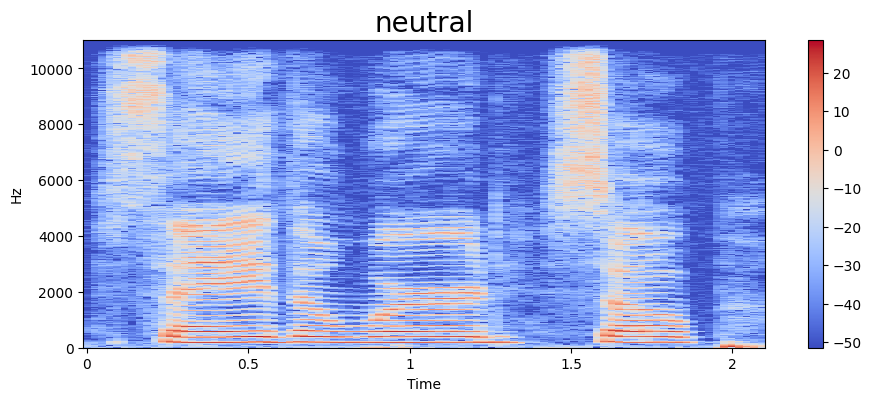

In [15]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

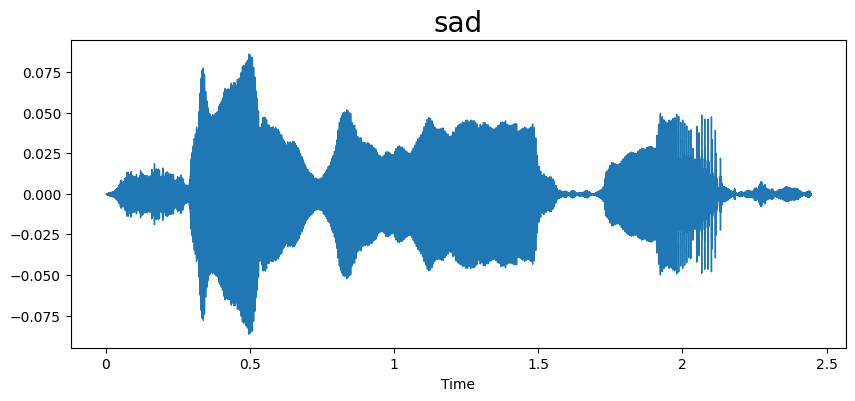

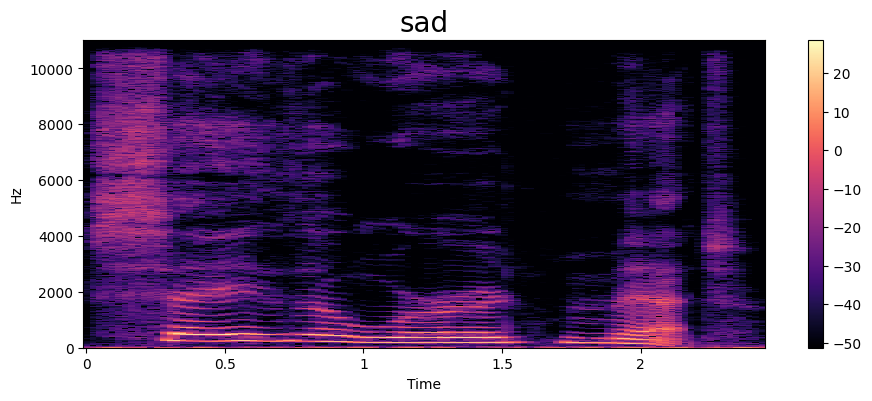

In [16]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

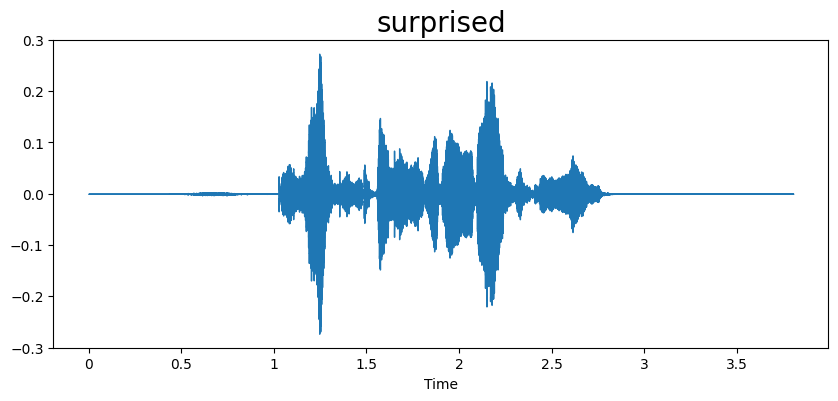

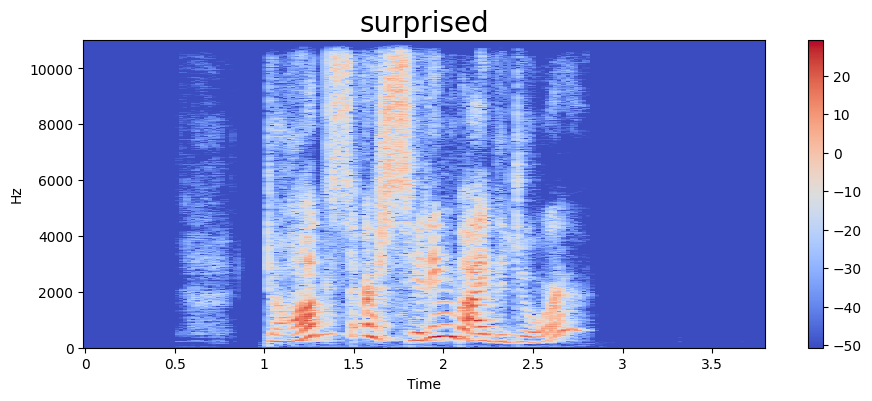

In [18]:
emotion = 'surprised'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

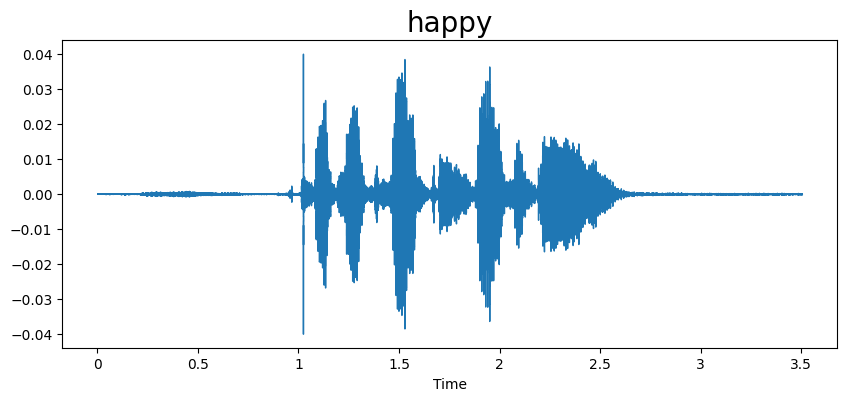

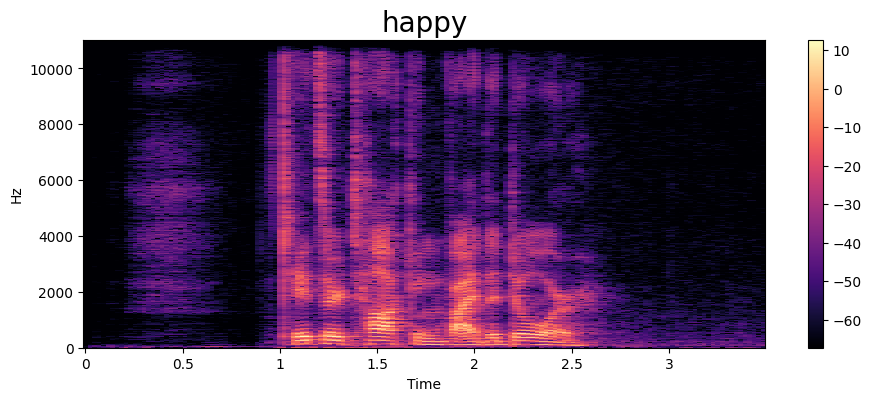

In [19]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

**Feature Extraction**


In [20]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [21]:
extract_mfcc(df['speech'][0])

array([-6.2767755e+02,  8.7534523e+01, -3.0839722e+00,  2.1049519e+01,
        1.3147680e+01, -1.3554847e+00, -3.1067307e+00, -8.1870680e+00,
        2.0308278e+00,  3.5969923e+00, -3.0851402e+00,  1.7008768e+00,
        4.5709705e+00, -5.0973439e+00, -2.2995241e-01,  4.9479318e+00,
       -5.6710854e+00,  4.4801159e+00, -5.1156616e-01, -3.1565239e+00,
       -4.3470688e+00, -8.3346158e-01, -3.0914521e+00, -4.8970139e-01,
       -4.7948861e+00,  5.0263314e+00, -4.4741116e+00,  2.7610741e+00,
       -4.5214796e+00, -1.2693298e+00, -2.2928309e+00,  3.7130475e+00,
       -4.3506539e-01, -5.7212234e-01, -1.5539187e+00, -3.5727158e+00,
       -3.4011292e+00, -5.0568813e-01,  8.1906539e-01,  3.9035503e-03],
      dtype=float32)

In [22]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))


In [23]:
X_mfcc


0       [-627.67755, 87.53452, -3.0839722, 21.049519, ...
1       [-306.40067, 26.507275, -27.71021, 31.84816, -...
2       [-344.5022, 57.336815, -18.94379, 23.9524, -5....
3       [-535.7835, 50.710476, -0.5517046, 6.139987, 0...
4       [-452.87976, 104.957016, 26.652924, -7.4148507...
                              ...                        
4043    [-535.6866, 93.98498, 33.603077, 13.085668, 25...
4044    [-537.179, 89.04016, 37.406197, 19.902514, 30....
4045    [-545.9006, 103.277054, 28.864674, 12.691002, ...
4046    [-498.19632, 68.23838, -19.412458, 4.3837194, ...
4047    [-407.77454, 89.18332, 27.131931, 44.725517, 5...
Name: speech, Length: 4048, dtype: object

In [24]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(4048, 40)

In [25]:
## input split
X = np.expand_dims(X, -1)
X.shape

(4048, 40, 1)

In [26]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [27]:
y = y.toarray()

In [28]:
y.shape


(4048, 7)

**Create the LSTM Model**

In [32]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, BatchNormalization
from keras.optimizers import Adam

model = Sequential([
    LSTM(512, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(256, activation='relu'),
    Dropout(0.2),

    Dense(128, activation='relu'),
    Dropout(0.2),


    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])


optimization = Adam(learning_rate=0.0001)
model.compile(optimizer=optimization, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 512)               1052672   
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 128)               32896     
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 64)               

In [33]:
from keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau
# callbacks
checkpoint = ModelCheckpoint("model2.h5",monitor='val_accuracy',verbose=1,save_best_only=True,mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                                        restore_best_weights=True,
                                        patience=10,
                                        verbose=1,
                                        min_delta=0)
reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                                        factor=0.2,
                                        patience=10,
                                        verbose=1,
                                        min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 50

In [ ]:
# Train the model
history = model.fit(X, y, validation_split=0.2, epochs=50, batch_size=128)

Epoch 1/50
26/26 [==============================] - 1s 22ms/step - loss: 1.2395 - accuracy: 0.5154 - val_loss: 2.9263 - val_accuracy: 0.2123
Epoch 2/50
26/26 [==============================] - 0s 17ms/step - loss: 1.2169 - accuracy: 0.5408 - val_loss: 3.0044 - val_accuracy: 0.2099
Epoch 3/50
26/26 [==============================] - 0s 17ms/step - loss: 1.1806 - accuracy: 0.5380 - val_loss: 3.0636 - val_accuracy: 0.2123
Epoch 4/50
26/26 [==============================] - 0s 17ms/step - loss: 1.1826 - accuracy: 0.5355 - val_loss: 3.1207 - val_accuracy: 0.2099
Epoch 5/50
26/26 [==============================] - 0s 18ms/step - loss: 1.1564 - accuracy: 0.5550 - val_loss: 3.1705 - val_accuracy: 0.2123
Epoch 6/50
26/26 [==============================] - 0s 18ms/step - loss: 1.1321 - accuracy: 0.5599 - val_loss: 3.2185 - val_accuracy: 0.2123
Epoch 7/50
26/26 [==============================] - 0s 18ms/step - loss: 1.1369 - accuracy: 0.5556 - val_loss: 3.2588 - val_accuracy: 0.2111
Epoch 8/50
26

**Plot the results**


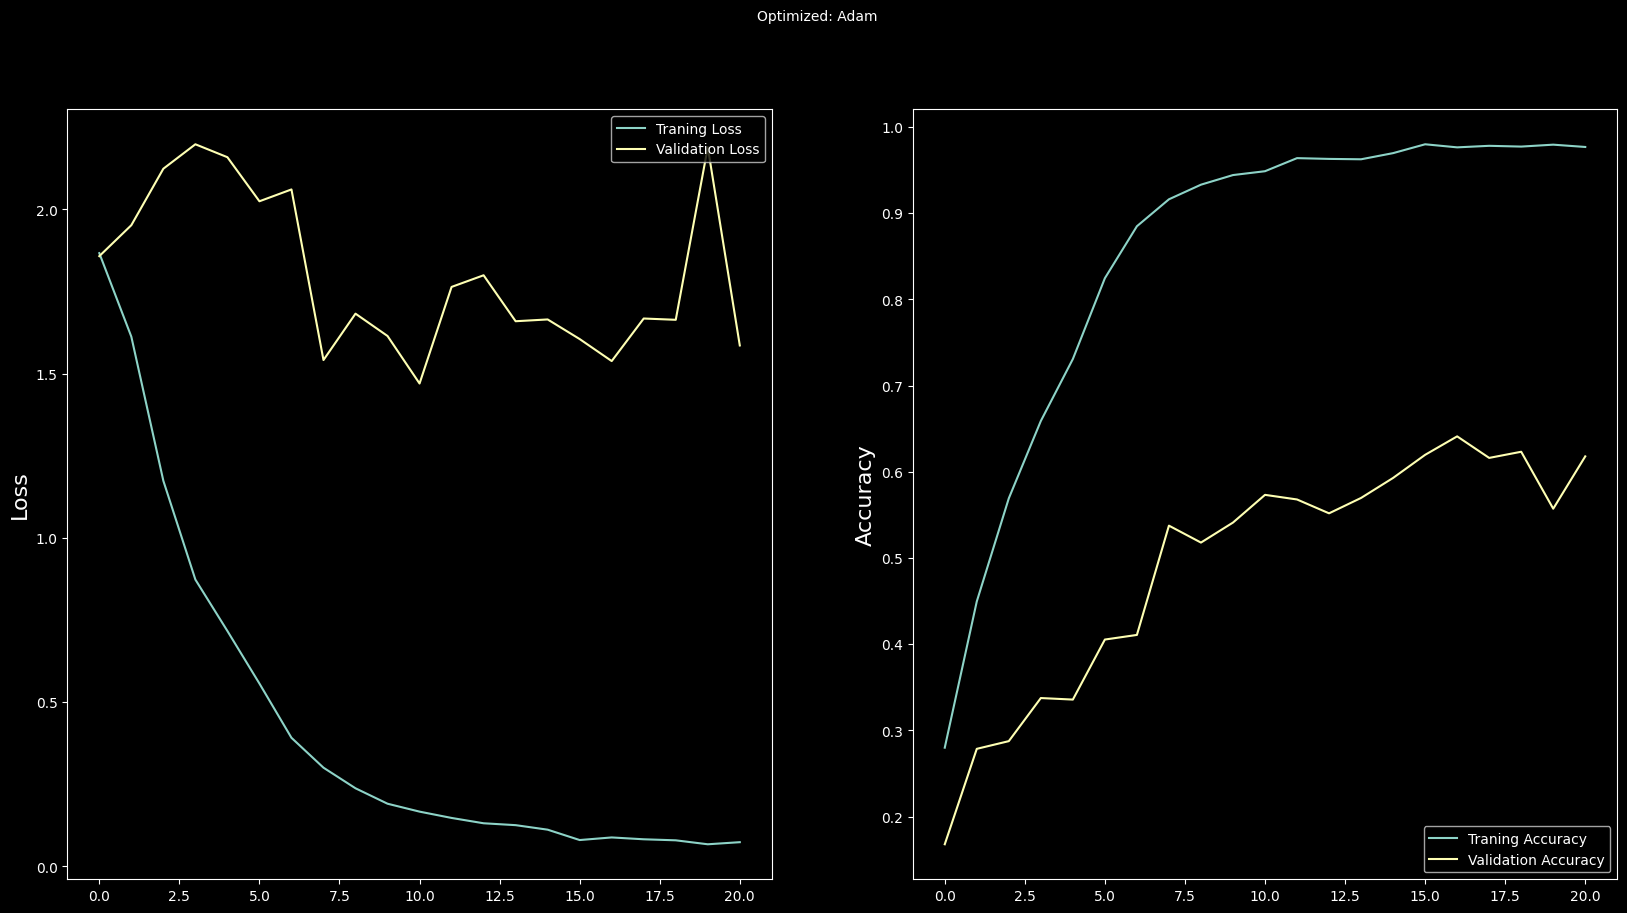

In [52]:
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.suptitle('Optimized: Adam', fontsize=10)
plt.ylabel('Loss',fontsize=16)
plt.plot(history.history['loss'],label='Traning Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1,2,2)
plt.ylabel('Accuracy',fontsize=16)
plt.plot(history.history['accuracy'],label='Traning Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()